# __Identification of the DFN connected structure and backbone__

### Problem statement
In fracture networks, some fractures have no or negligible contribution to the flow. These fractures are part of unconnected clusters or dead-ends. 
<br>
In this tutorial, we present how you can remove these structures from a DFN before solving the flow.


<center>
<div>
<img src="https://gitlab.com/fractorylab/dfnlab/-/raw/master/Tutorials/img/backbone.PNG" width="800"/>
</div>
<br>
The process of DFN backbone extraction is based on a graph approach
</center>

### Theoretical background
A DFN has often several clusters, i.e. several groups of connected fractures but disconnected from each other.
Removing the clusters that are not connected to any hydraulic boundary condition is compulsory before solving the flow.
<br>
Dead-ends are sets of fractures connected to the main structure by a unique intersection. They can also be removed to fasten flow solving. The remaining structure is called the hydraulic backbone.

### What will you learn ?
- Identify the different clusters of a DFN.
- Select the connected clusters of a DFN (compulsory before solving the flow).
- Remove the dead-ends of the connected clusters. 

### DFN.Lab model

The identification of the connected structure and backbone is based on graph representation of the system. 
<br>
Knowledge about boundary conditions is required (see ["Tutorial 8"](008-Flow_boundary_condition.ipynb)).
<br>
The required module is __Analysis__.

In [1]:
import dfnlab.Analysis as analysis

__________________

## Example 1: Backbone identification in permeameter conditions

First, we initialize the system, made of a cubic domain and we then import a DFN from file.

In [2]:
import dfnlab.Fractures as dfn
import dfnlab.Domains as dom
import dfnlab.System as sys
import dfnlab.IO as io
import os

system = sys.System()
domain = dom.Domain()
domain.buildParallelepiped(center=[0, 0, 0], L1=100.)
system.setDomain(domain)
fnet = dfn.DFN()
io.load_DFN_file(fnet, os.getcwd()+'/sources/dfnConnectedStructures.disk', format="disk") 
system.setDFN(fnet)
system.build()

Then, we apply permeameter conditions in the y direction.

In [3]:
import dfnlab.FlowBoundaryConditions as bc
import numpy as np

bc.FlowBoundaryCondition.setPermeameter(domain=domain, deltahead=10, direction=np.array([0,1,0]))

#### Clusters identification

The function _identifyClusters_ identify clusters and assigns an index to each one of them. These indices are also automatically assigned to the cluster fractures.  

Number of fractures in the complete dfn: 4982


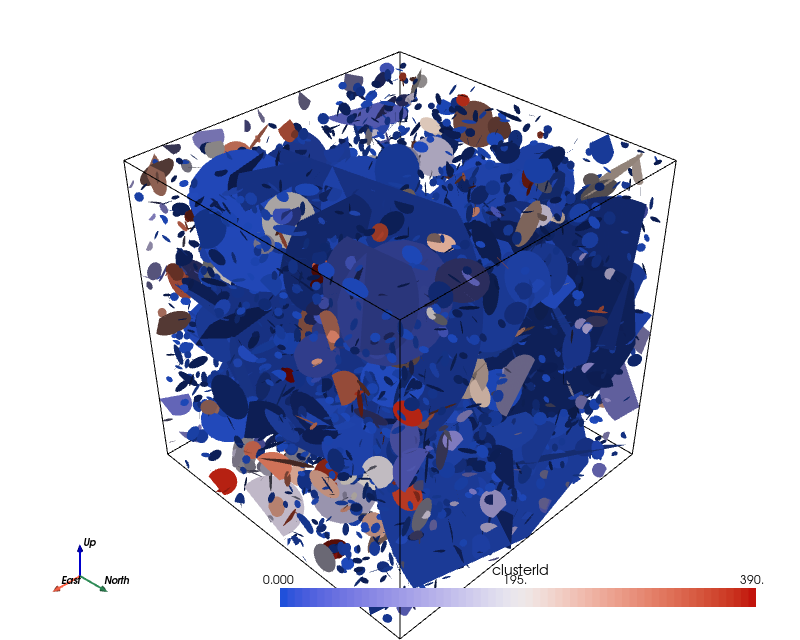

In [4]:
analyser = analysis.Analyser(system)
analyser.identifyClusters("clusterId")
print('Number of fractures in the complete dfn: '+str(fnet.numFractures()))

from sources.functions import plot_dfn
plot_dfn(system,"clusterId")

#### Selection of the connected clusters

The function _keepConnectedClusters_ selects clusters connected to at least two boundary conditions (except no-flow conditions) and returns a new system.

Number of fractures in the connected dfn: 882


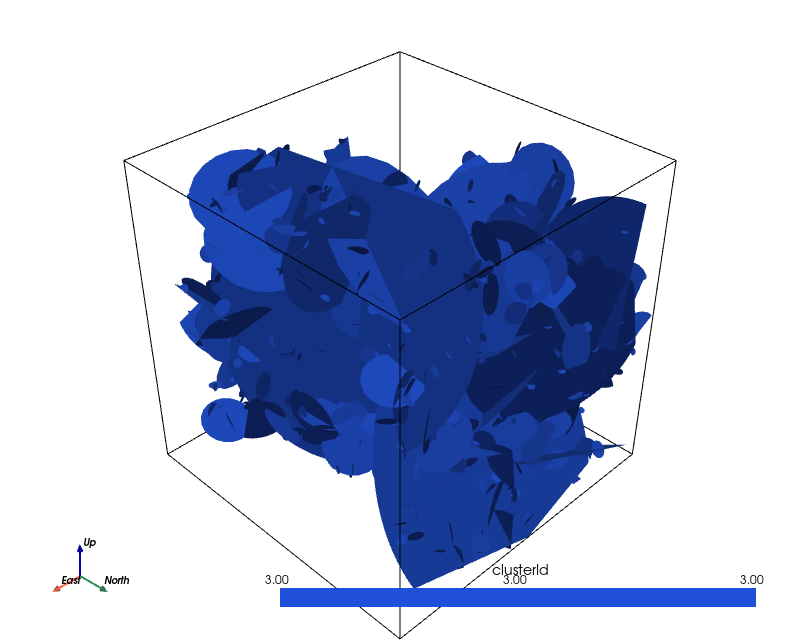

In [5]:
cluster = analyser.keepConnectedClusters()
print('Number of fractures in the connected dfn: '+str(cluster.getDFN().numFractures()))

plot_dfn(cluster,"clusterId")

You may also want to overwrite the existing system as follow:
```python
analyser.keepConnectedClusters(overwrite=True)
```

#### Selection of the backbone

The function _keepBackbone_ removes also the deads ends, i.e. fractures having only one intersection with the main cluster (iteratively).

Number of fractures in the backbone dfn: 311


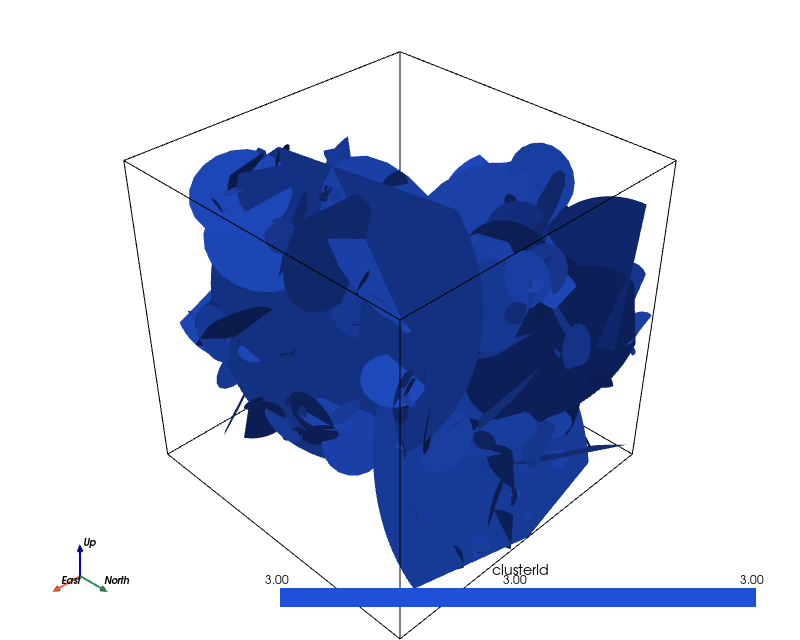

In [6]:
backbone = analyser.keepBackbone()
print('Number of fractures in the backbone dfn: '+str(backbone.getDFN().numFractures()))

plot_dfn(backbone,"clusterId")

You may also want to overwrite the existing system as follow:
```python
analyser.keepBackbone(overwrite=True)
```

__________________

## Example 2: Backbone identification with boundary conditions on two wells
This example is similar to the previous one, except that flow boundary conditions are only applied on two wells.

First, we initialize the system, made of a cubic domain and import a DFN from a disk file, and define two wells.

In [7]:
system = sys.System()
domain = dom.Domain()
domain.buildParallelepiped(center=[0, 0, 0], L1=100.)
system.setDomain(domain)
fnet = dfn.DFN()
io.load_DFN_file(fnet, os.getcwd()+'/sources/dfnConnectedStructures.disk', format="disk") 
system.setDFN(fnet)
well1 = dom.Well1D(point1=[0,-20,50], point2=[0,-20,-50]) 
well2 = dom.Well1D(point1=[0,+20,50], point2=[0,+20,-50]) 
system.addGeometry(well1) 
system.addGeometry(well2) 
system.build()

Then, we apply different pressure in the two wells.

In [8]:
bc.FlowBoundaryCondition.setHead(well1,head=10)
bc.FlowBoundaryCondition.setHead(well2,head=-10)

As done previously, we can identify the clusters, keep the connected one or the backbone structure between the two wells.

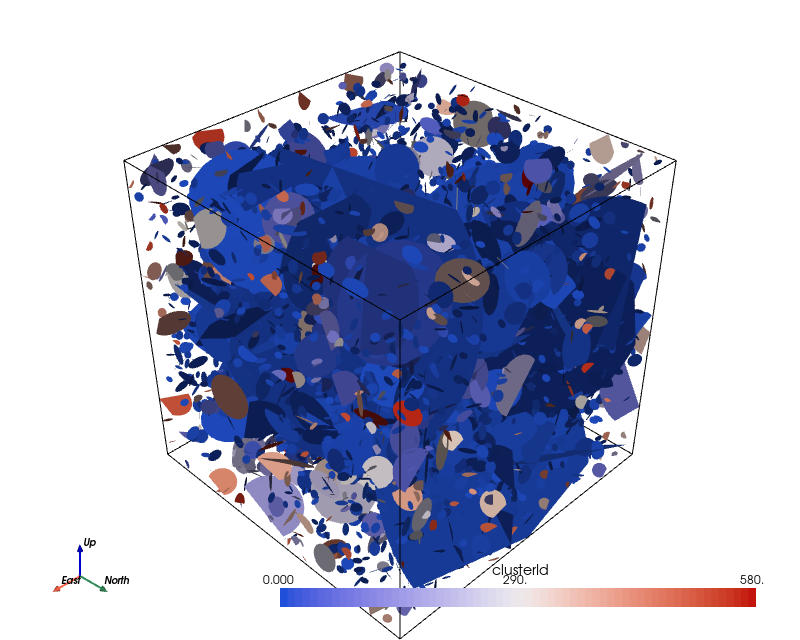

In [9]:
analyser = analysis.Analyser(system)
analyser.identifyClusters("clusterId")

from sources.functions import plot_dfn_and_geometries
plot_dfn_and_geometries(system,"clusterId")

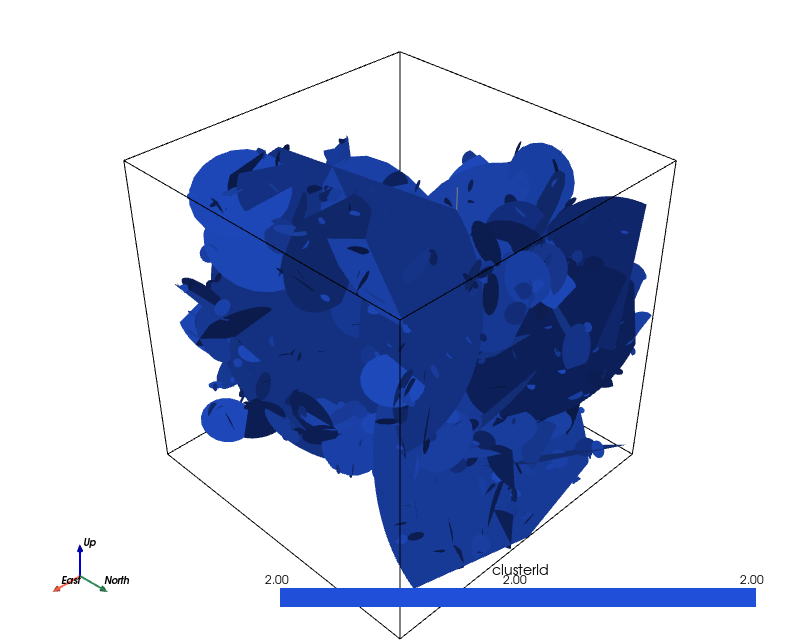

In [10]:
cluster = analyser.keepConnectedClusters()
plot_dfn_and_geometries(cluster,"clusterId")

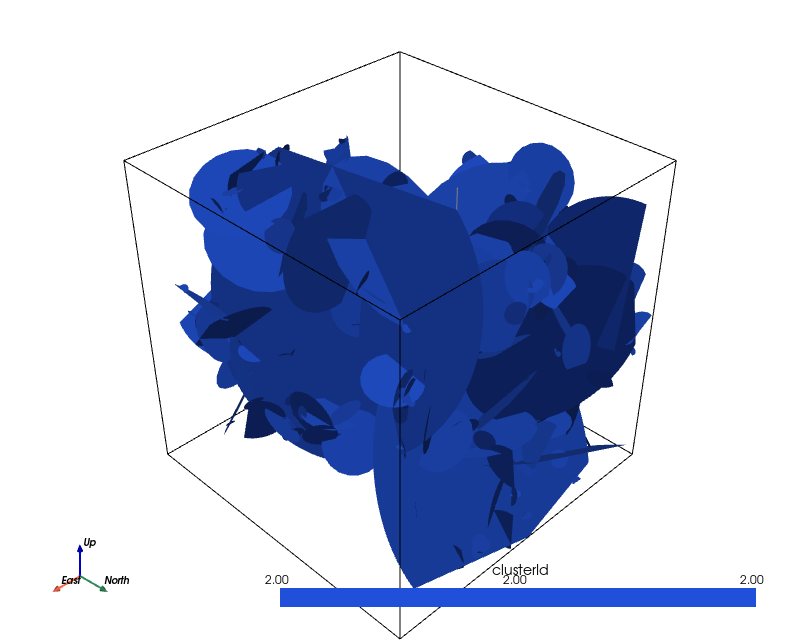

In [11]:
backbone = analyser.keepBackbone()
plot_dfn_and_geometries(backbone,"clusterId")